In [58]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import statistics

In [3]:
# Mission 1 -
# faire du nettoyage
# voir pour faire des choix sur le traitement 
# des valeurs manquantes ou aberrantes

In [4]:
clients = pd.read_csv("clients.csv")
clients

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [5]:
clients.info()
# this df seems clear with no null values (8623/8623)
# like the others df, by the way

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [6]:
# check duplicates (here, nothing ...)
clients = clients.drop_duplicates()
len(clients)

8623

In [7]:
clients.isnull().sum().sort_values(ascending = False)/len(clients)

client_id    0.0
sex          0.0
birth        0.0
dtype: float64

In [8]:
produits = pd.read_csv("produits.csv")
produits

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [9]:
produits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [10]:
produits = produits.drop_duplicates()
len(produits)

3287

In [11]:
produits.isnull().sum().sort_values(ascending = False)/len(produits)

id_prod    0.0
price      0.0
categ      0.0
dtype: float64

In [12]:
produits['price'].values

array([19.99,  5.13, 17.99, ..., 11.22, 38.56, 25.16])

<AxesSubplot:>

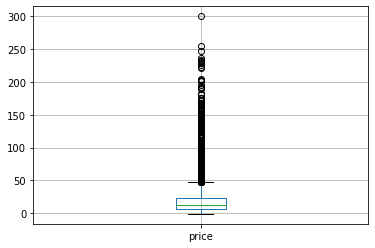

In [13]:
produits[['price']].boxplot()

In [14]:
produits['price'].min()

-1.0

In [15]:
produits['price'].max()

300.0

In [16]:
neg = produits[produits['price'].between(-1, 0)]
neg
# delete the values because a price can't be negative

,id_prod,price,categ
731,T_0,-1.0,0


In [28]:
new_produits = produits.drop([produits.index[731]])
new_produits

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [18]:
ventes = pd.read_csv("ventes.csv")
ventes

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242
...,...,...,...,...
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137
337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5


In [19]:
ventes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337016 entries, 0 to 337015
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     337016 non-null  object
 1   date        337016 non-null  object
 2   session_id  337016 non-null  object
 3   client_id   337016 non-null  object
dtypes: object(4)
memory usage: 10.3+ MB


In [20]:
ventes = ventes.drop_duplicates()
len(ventes)
# here, there are some duplicates

336890

In [21]:
ventes.isnull().sum().sort_values(ascending = False)/len(ventes)

id_prod       0.0
date          0.0
session_id    0.0
client_id     0.0
dtype: float64

In [22]:
# Mission 2 -
# analyse des données et trouver du sens pour comprendre les ventes
# indicateurs de tendance centrale et de dispersion
# analyse de concentration par courbe de Lorenz/indicateur de Gini
# représentation graphique (histogramme, boxplot, séries temporelles)
# analyses bivariées

In [37]:
# moyenne des prix
moy = sum(produits['price'])/len(produits['price'])
moy

21.863597078514857

In [45]:
# médiane des prix
me = statistics.median(produits['price'])
me

13.075

In [47]:
# calcul variance
var = sum((xi - moy) ** 2 for xi in produits['price'] / len(produits['price']))
var

1569807.8413045476

In [49]:
# calcul écart-type
var_res = var ** (0.5)
var_res

1252.9197266004505

ValueError: x and y must have same first dimension, but have shapes (50,) and (1,)

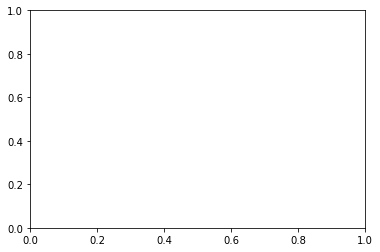

In [65]:
# courbe de Lorenz
depenses = produits[produits['price'] < 0]
dep = -depenses['price'].values
n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

xaxis = np.linspace(0, 300) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.show()

In [ ]:
def gini(arr):
    ## first sort
    sorted_arr = arr.copy()
    sorted_arr.sort()
    n = arr.size
    coef_ = 2. / n
    const_ = (n + 1.) / n
    weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_arr)])
    return coef_*weighted_sum/(sorted_arr.sum()) - const_
